BioE 131

Lab 02

Forrest Li, Zack Scheftel

In [75]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt
from Bio import Phylo
from io import StringIO
from Bio import AlignIO

This lab is an exercise in using MUSCLE (Bob Edgar) to produce a multiple sequence alignment and using FastTree (Morgan Price) to produce a phylogenetic tree from the MSA.  The pre-processing of the Newick tree involves the following terminal commands:



```muscle -in seqs.fa -out seqs.aligned.fa
fasttree -nt < seqs.aligned.fa > tree.nwk```

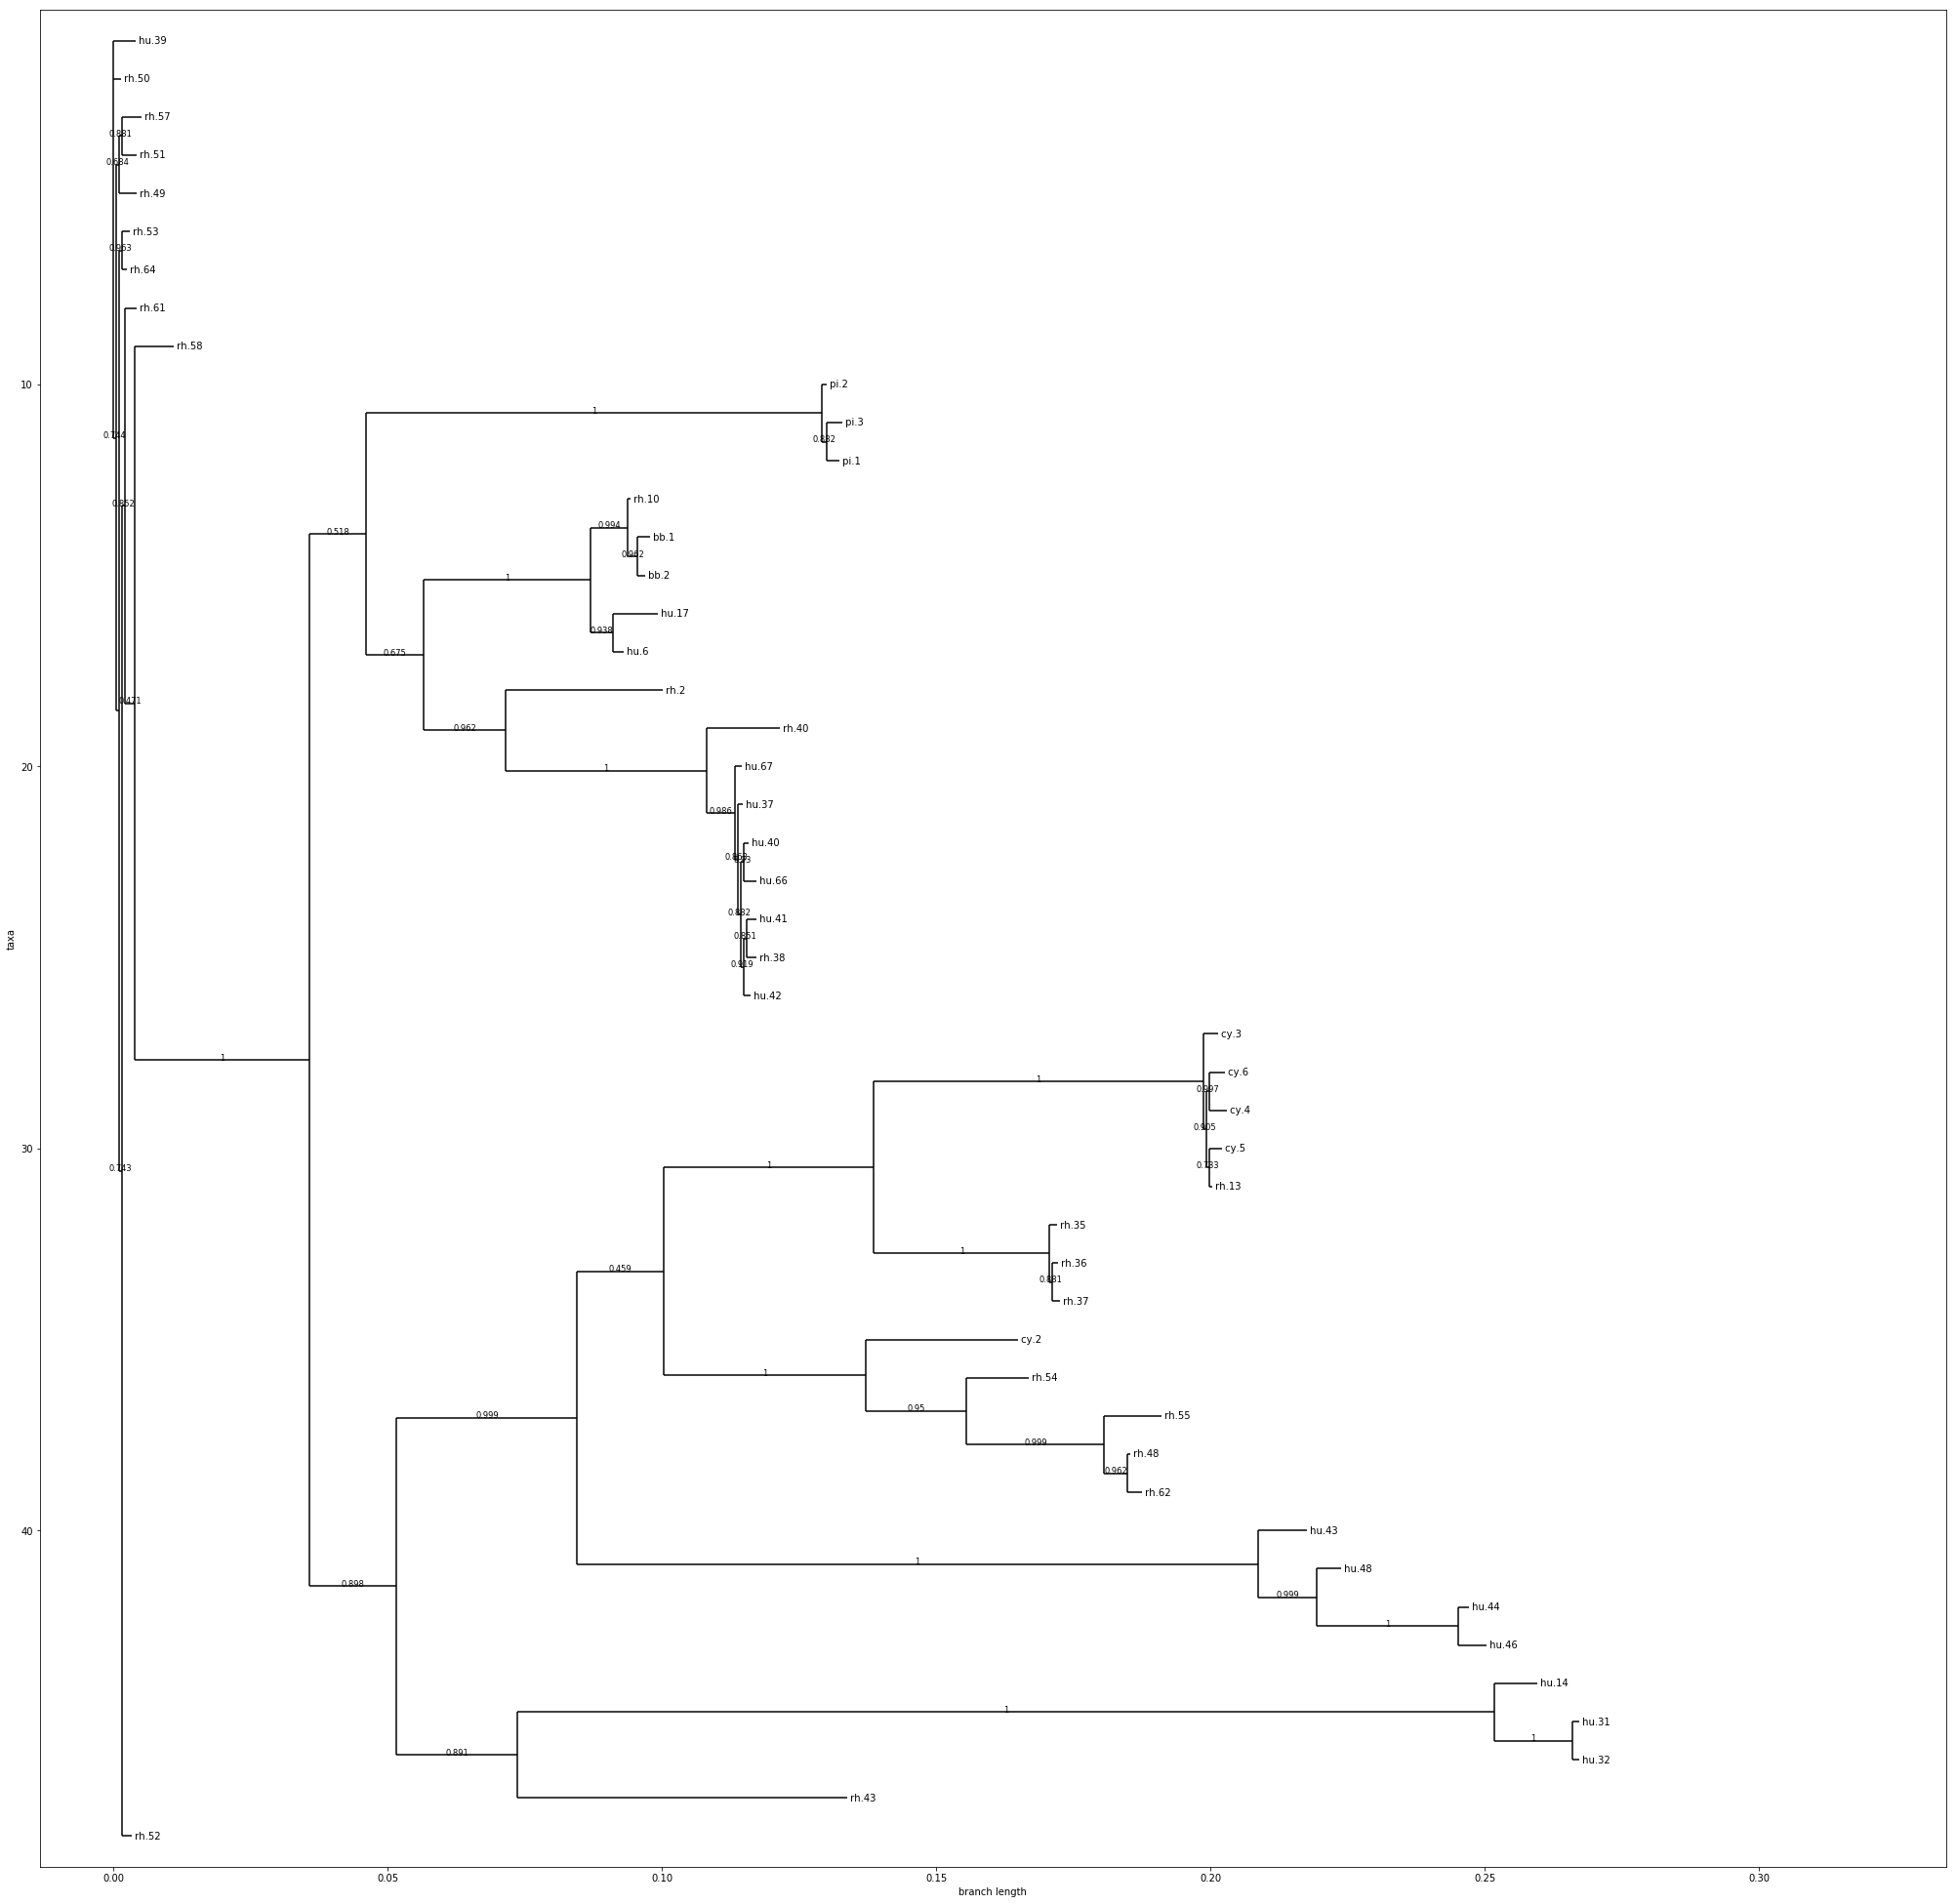

In [88]:
tree = Phylo.read('tree.nwk', 'newick')
Phylo.draw(tree)
plt.rcParams['figure.figsize'] = [35, 35]

We see in this tree that they are clear groupings of species, such as the cy.3, 4, 5, and 6 branch, and the hu.37, 67, 40, 66, 41, etc. branch.  We see that pi and rh groups are more distant from hu and cy families on these branches.
We now use SeqIO to select individual sequences from each distinct branch for BLAST analysis.

In [77]:
record_dict = SeqIO.index('seqs.fa', 'fasta')
print(record_dict['cy.3'])
print(record_dict['rh.36'])
print(record_dict['hu.44'])
print(record_dict['pi.3'])

ID: cy.3
Name: cy.3
Description: cy.3
Number of features: 0
Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet())
ID: rh.36
Name: rh.36
Description: rh.36
Number of features: 0
Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet())
ID: hu.44
Name: hu.44
Description: hu.44
Number of features: 0
Seq('atggctgccgatggttatcttccagattggctcgaggacactctctctgaagga...taa', SingleLetterAlphabet())
ID: pi.3
Name: pi.3
Description: pi.3
Number of features: 0
Seq('atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet())


For cy.3 we mainly see matches with the non-human primate AAVcy capsid protein VP1 genes, as well as some hits to AAVrh VP1.

For rh.36 we mainly see matches with AAVrh VP1 genes, with some hits to AAVcy VP1 genes.

For hu.44 we now see adeno-associated (likely human) AAVhu VP1 genes, but fewer cy and rh hits.

For pi.3 we see the closest hits with AAVpi VP1 genes, then rh genes, which is consistent with our tree.

From my selection, I did not see any that did not necessarily match the others, we generally do not trust annotations from BLAST sequences due to partial homologies in large sequences causing high E-values and identity matches with other genes.

In [78]:
align = AlignIO.read('seqs.aligned.fa', 'fasta')

In [79]:
cluster_1 = align[:]

In [80]:
from Bio import SeqUtils

In [81]:
GC_content = []
ln = len(cluster_1[:, 0]) 
for i in range(len(cluster_1[0, :])):
    GC_content.append(SeqUtils.GC(cluster_1[:, i]) / 100)
GC_content = np.array(GC_content)
AT_content =  1 - GC_content


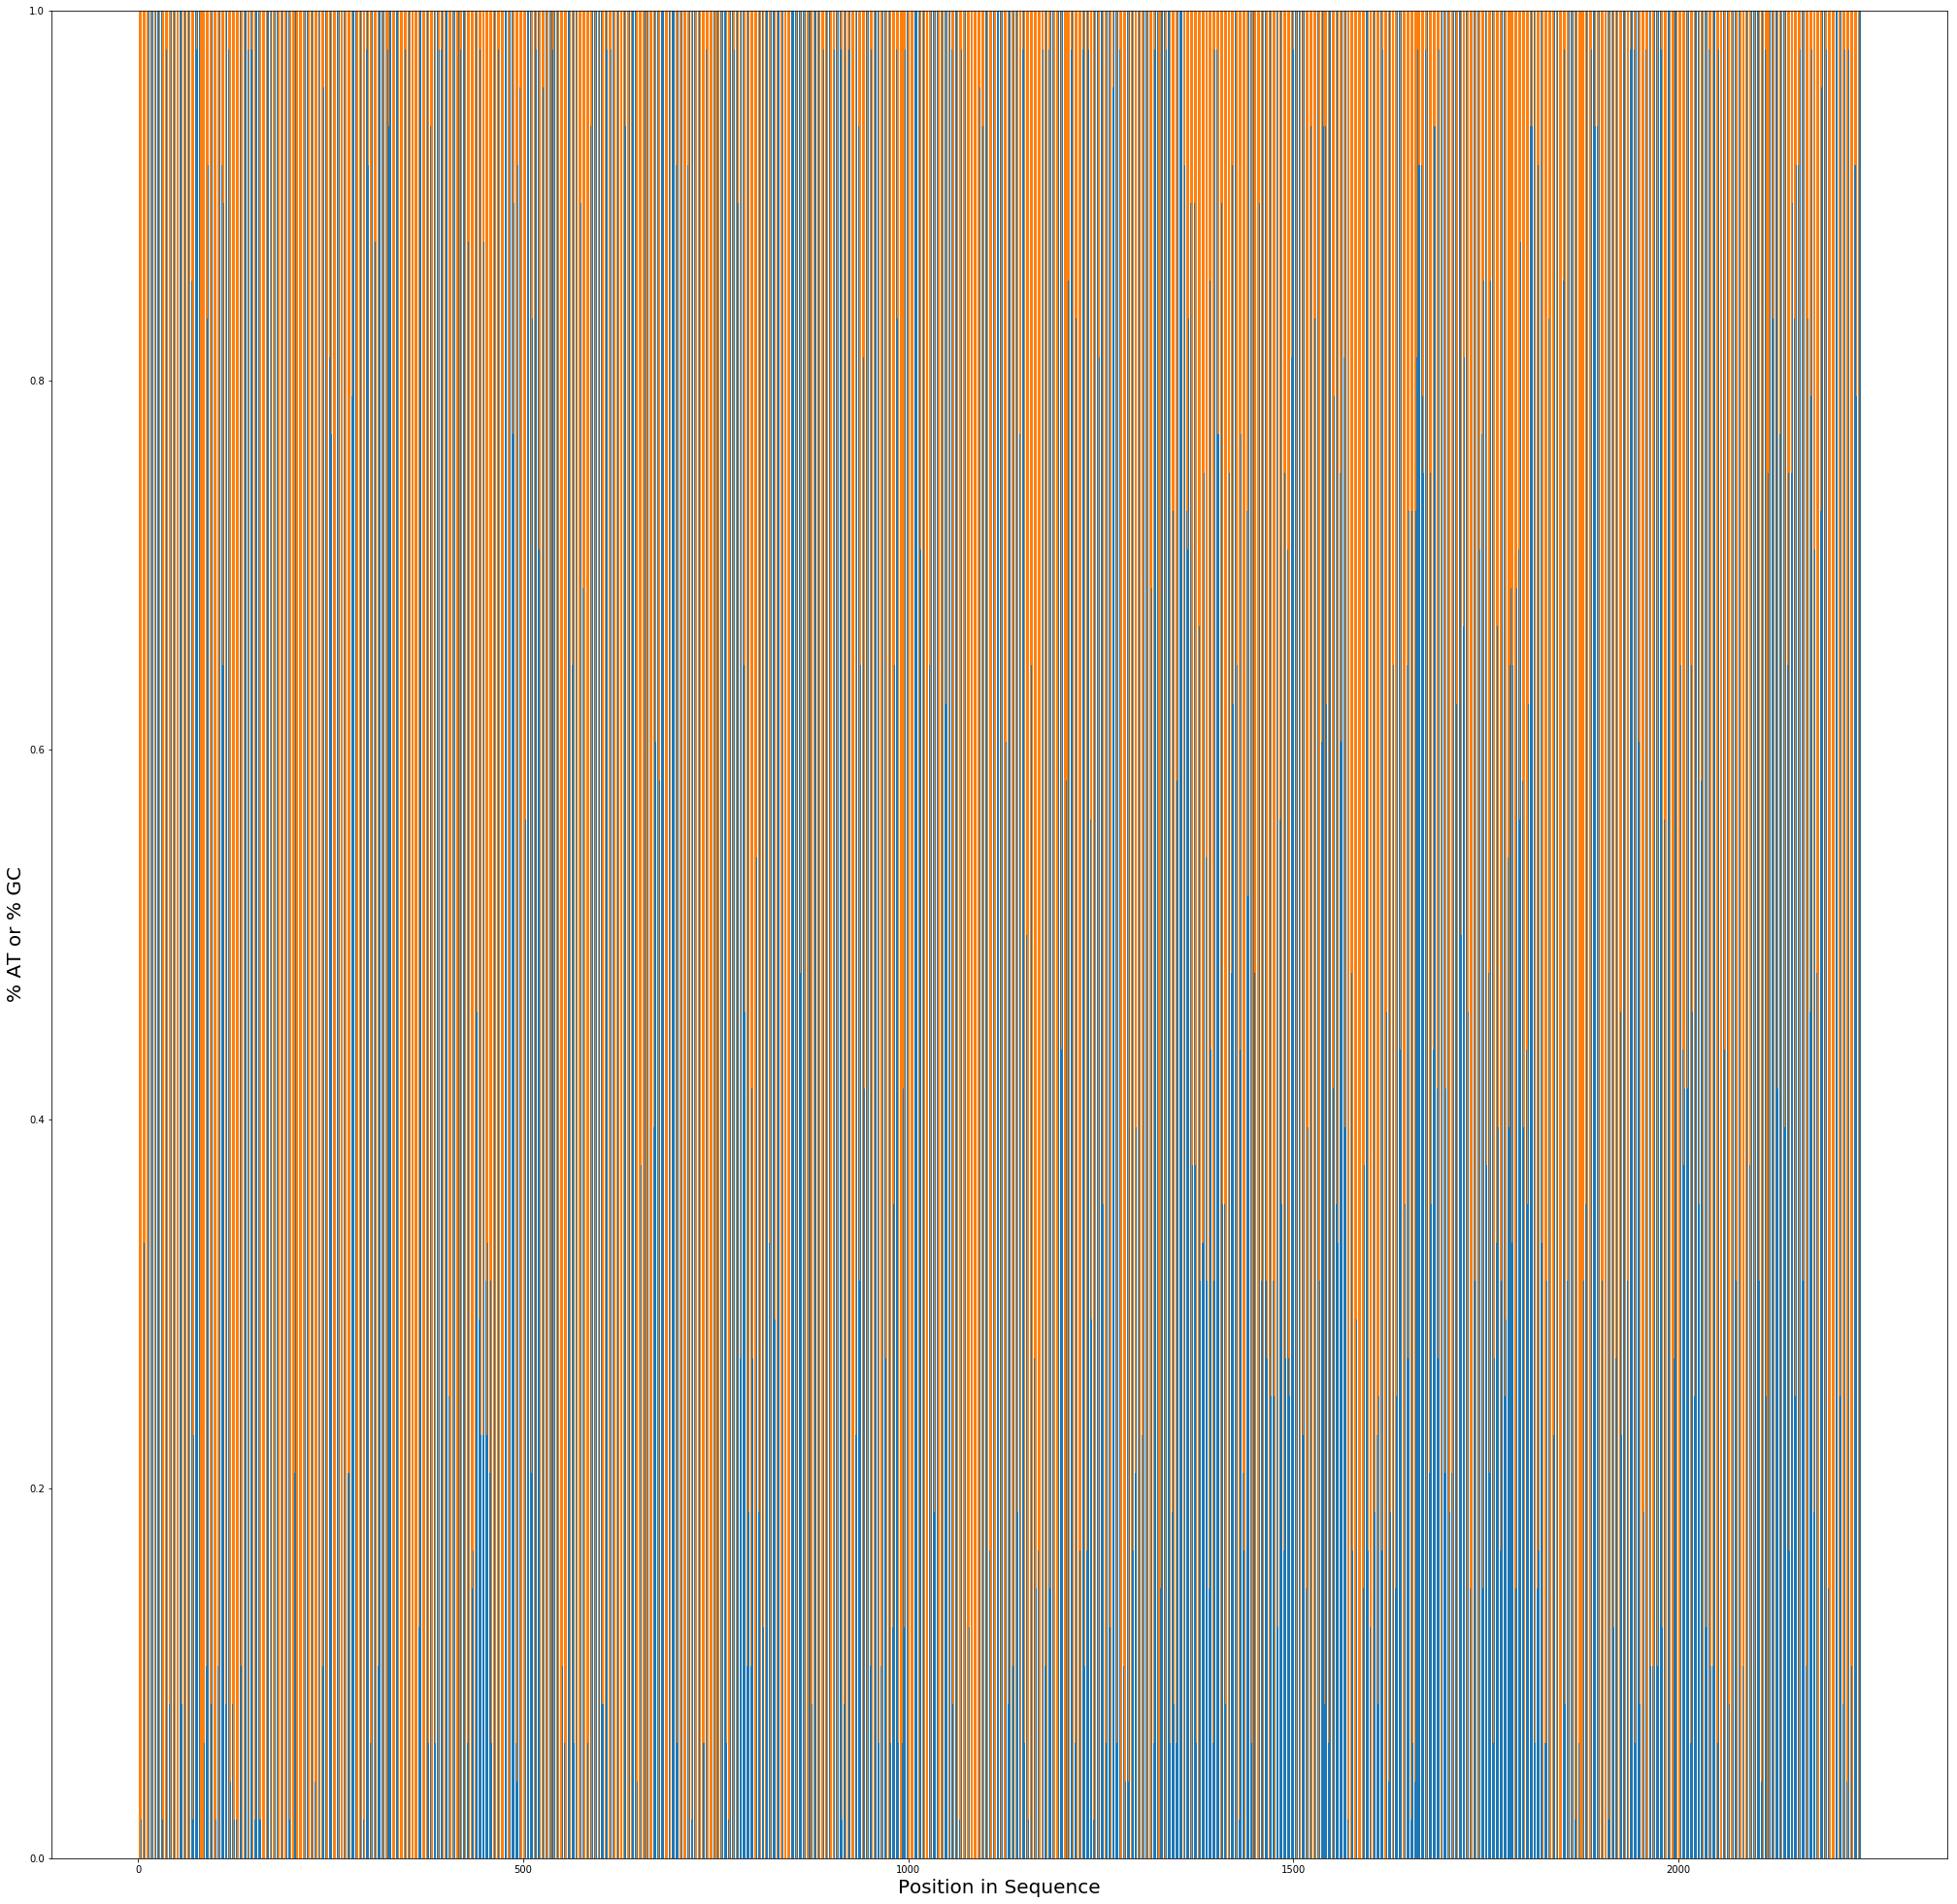

In [82]:
plt.bar(range(len(AT_content)), AT_content, 0.75)
plt.bar(range(len(GC_content)), GC_content, 0.75, bottom=AT_content)
plt.xlabel("Position in Sequence", fontsize = 20)
plt.ylabel("% AT or % GC", fontsize = 20)
plt.show()

Since we had difficulties figuring out how and in what method to separate our sequence list into various clusters (lack of cutoff point), we decided to use the combined MSA to produce a GC content graph showing the proportion of GC content for each position in the 2238 length MSA sequences.  Thus, for example, we see greater AT content around bases 1600 relative to the rest of the MSA.

In [83]:
GC_values = [SeqUtils.GC(rec.seq) / 100 for rec in SeqIO.parse('seqs.aligned.fa', 'fasta')]
GC_values = np.array(GC_values)
AT_values =  1 - GC_values

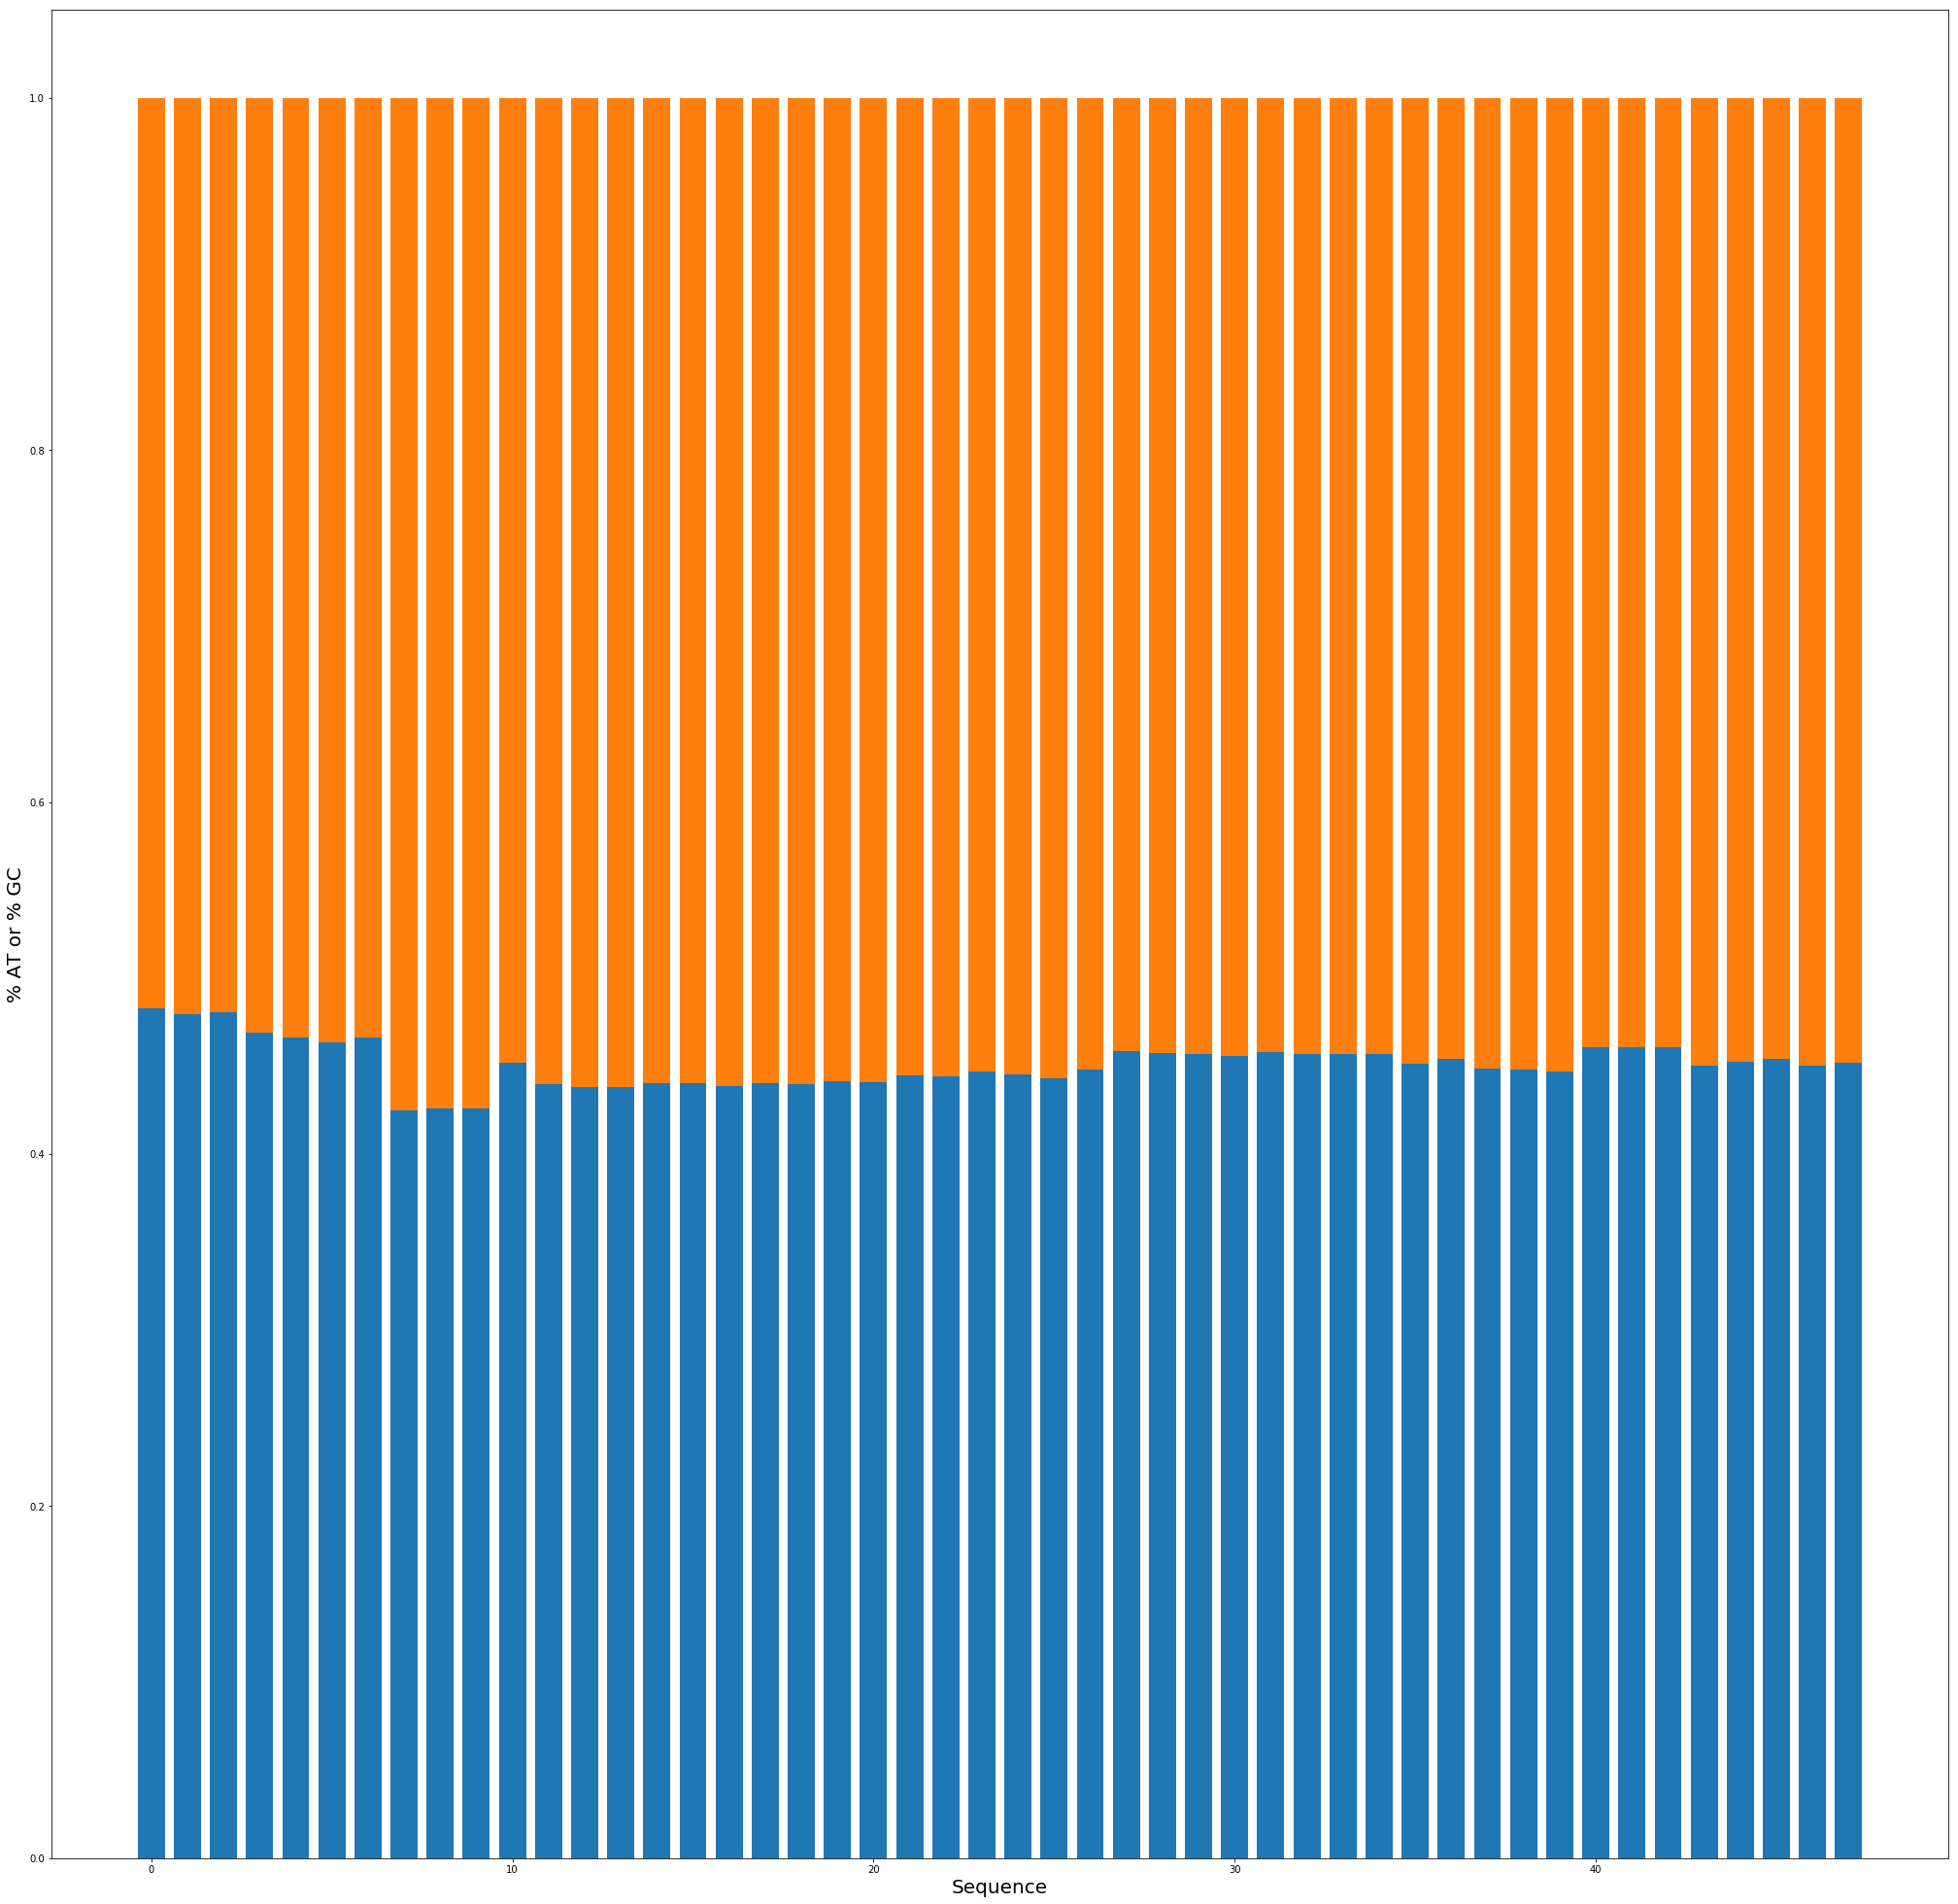

In [84]:
plt.bar(range(len(AT_values)), AT_values, 0.75)
plt.bar(range(len(GC_values)), GC_values, 0.75, bottom=AT_values)
plt.xlabel("Sequence", fontsize = 20)
plt.ylabel("% AT or % GC", fontsize = 20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

However, since it appeared from the example that there were less bars in the graph, we also created a graph indicating GC content for each individual sequence in the dataset.

In [85]:
sequences = list(SeqIO.parse('seqs.fa', 'fasta'))
cluster2 = sequences[:12]
cluster3 = sequences[12:24]
cluster4 = sequences[24:36]
cluster5 = sequences[36:48]

cluster_2 = []
for i in range(12):
    cluster_2.append(len(cluster2[i].seq))

cluster_3 = []
for i in range(12):
    cluster_3.append(len(cluster3[i].seq))
    
cluster_4 = []
for i in range(12):
    cluster_4.append(len(cluster4[i].seq))
    
cluster_5 = []
for i in range(12):
    cluster_5.append(len(cluster5[i].seq))

data = [cluster_2, cluster_3, cluster_4, cluster_5]


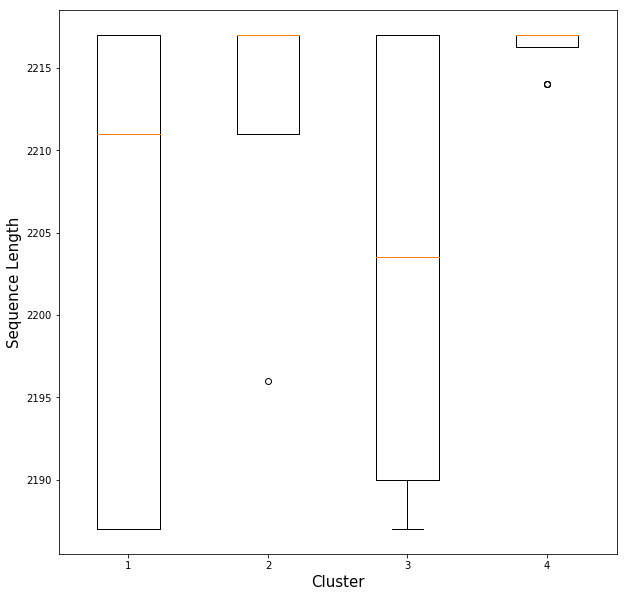

In [86]:
plt.boxplot(data)
plt.rcParams['figure.figsize'] = [7, 7]
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Sequence Length', fontsize = 15)
plt.show()

In this final graph, we create a boxplot on sequence length, but separating the dataset into 4 clusters simply based on order in the original fasta file.  We see that the second and fourth clusters have higher average sequence lengths than in clusters 1 and 2, but since there may not be many commonalities within these clusters, we can not make any inferences.